# 🚦 Traffic Prediction & Optimization
## Phase U – Advanced Data Understanding

Diese Phase untersucht die Daten strukturell, statistisch und visuell.

Ziele:
- Datenqualität prüfen
- Verteilungen analysieren
- Zeitliche Muster erkennen
- Abhängigkeiten verstehen
- Hypothesen für Modellierung ableiten

Die U-Phase ist kritisch:
Schlechte Daten → schlechtes Modell (Garbage In, Garbage Out).


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

np.random.seed(42)

date_range = pd.date_range("2025-01-01", periods=24*60, freq="H")

df = pd.DataFrame({"ds": date_range})

df["hour"] = df["ds"].dt.hour
df["weekday"] = df["ds"].dt.weekday

# Basisverkehr
traffic = 50 + 30*np.sin(df["hour"]/24 * 2*np.pi)

# Rush hour boost
traffic += np.where(df["hour"].isin([7,8,9,16,17,18]), 40, 0)

# Wochenende weniger Verkehr
traffic += np.where(df["weekday"] >= 5, -20, 0)

# Wettereffekt
weather = np.random.choice(["sun", "rain", "cloudy"], size=len(df), p=[0.5, 0.3, 0.2])
df["weather"] = weather

traffic += np.where(weather=="rain", -10, 0)

# Zufälliges Rauschen
traffic += np.random.normal(0, 6, len(df))

df["y"] = traffic.clip(lower=5)

df.head()


In [35]:
import pandas as pd
import numpy as np

# Test-Daten erzeugen
date_range = pd.date_range("2025-01-01", periods=24*7, freq="h")

df = pd.DataFrame({"ds": date_range})
df["y"] = np.random.randint(20, 100, size=len(df))

df.head()


,ds,y
0,2025-01-01 00:00:00,71
1,2025-01-01 01:00:00,34
2,2025-01-01 02:00:00,91
3,2025-01-01 03:00:00,80
4,2025-01-01 04:00:00,40


In [36]:
print("Shape:", df.shape)
print("\nDatentypen:")
display(df.dtypes)


Shape: (168, 2)

Datentypen:


ds    datetime64[us]
y              int32
dtype: object

In [37]:
print("Missing values:")
display(df.isnull().sum())

print("\nDuplicated rows:")
print(df.duplicated().sum())


Missing values:


ds    0
y     0
dtype: int64


Duplicated rows:
0


In [38]:
display(df.describe())


,ds,y
count,168,168.000000
mean,2025-01-04 11:30:00,58.928571
min,2025-01-01 00:00:00,20.000000
25%,2025-01-02 17:45:00,39.250000
50%,2025-01-04 11:30:00,60.500000
75%,2025-01-06 05:15:00,81.000000
max,2025-01-07 23:00:00,99.000000
std,NaN,23.898631


In [39]:
print("Skewness:", df["y"].skew())
print("Kurtosis:", df["y"].kurtosis())


Skewness: -0.06499506571958003
Kurtosis: -1.2228116056385634


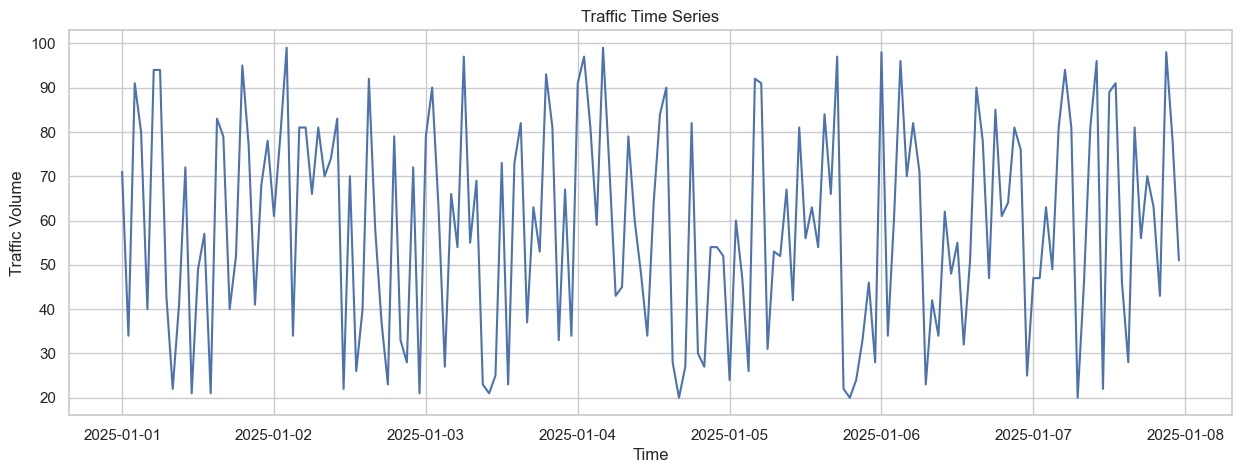

In [40]:
plt.figure(figsize=(15,5))
plt.plot(df["ds"], df["y"])
plt.title("Traffic Time Series")
plt.xlabel("Time")
plt.ylabel("Traffic Volume")
plt.show()


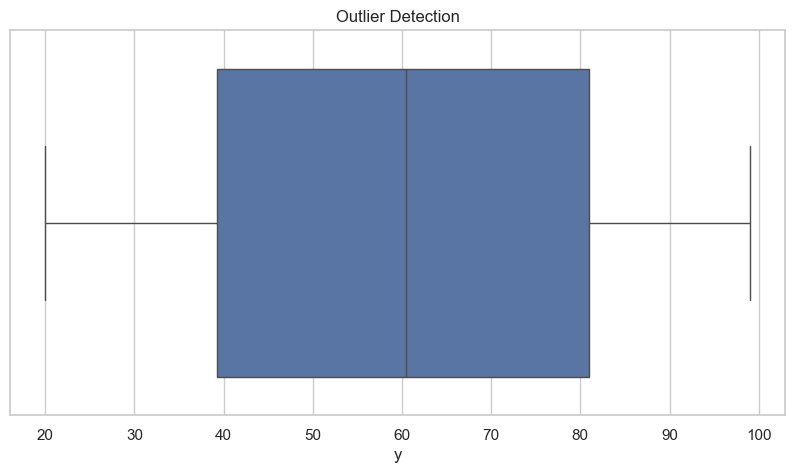

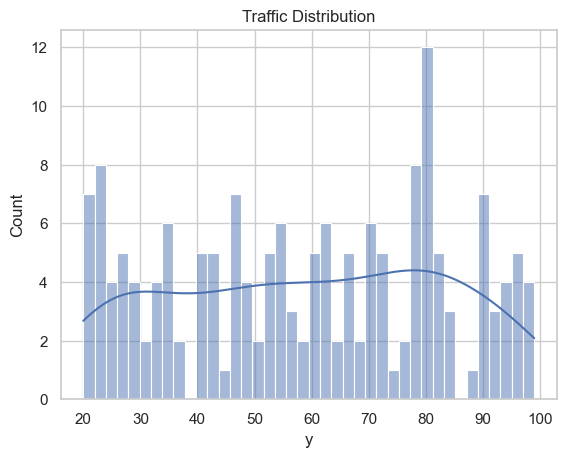

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["y"])
plt.title("Outlier Detection")
plt.show()

sns.histplot(df["y"], bins=40, kde=True)
plt.title("Traffic Distribution")
plt.show()


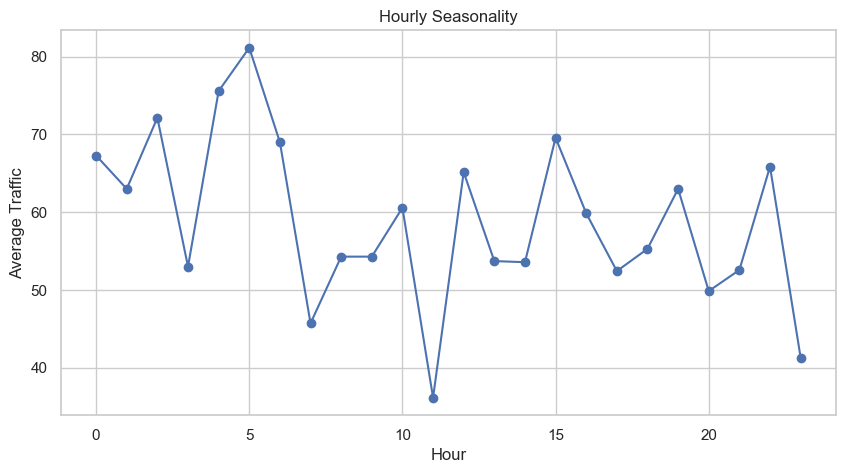

In [42]:
df["hour"] = df["ds"].dt.hour
df["weekday"] = df["ds"].dt.weekday

hour_avg = df.groupby("hour")["y"].mean()

hour_avg.plot(figsize=(10,5), marker="o")
plt.title("Hourly Seasonality")
plt.xlabel("Hour")
plt.ylabel("Average Traffic")
plt.show()


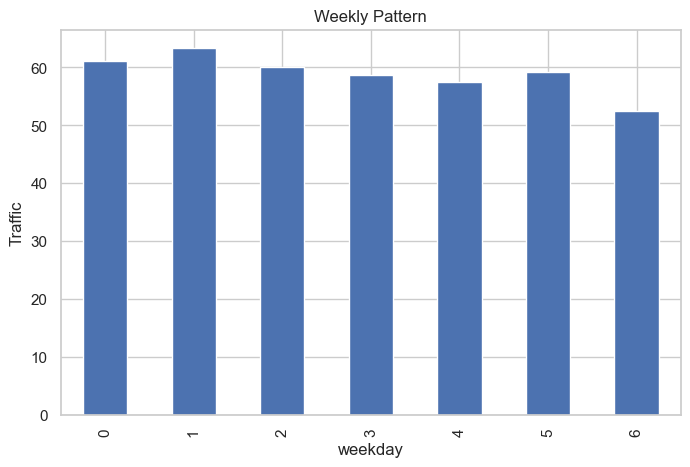

In [43]:

weekday_avg = df.groupby("weekday")["y"].mean()

weekday_avg.plot(kind="bar", figsize=(8,5))
plt.title("Weekly Pattern")
plt.ylabel("Traffic")
plt.show()


In [44]:
import numpy as np

# Zufällige Wetterdaten erzeugen
np.random.seed(42)  # für Reproduzierbarkeit
df["weather"] = np.random.choice(
    ["sun", "rain", "cloudy"],
    size=len(df),
    p=[0.5, 0.3, 0.2]
)


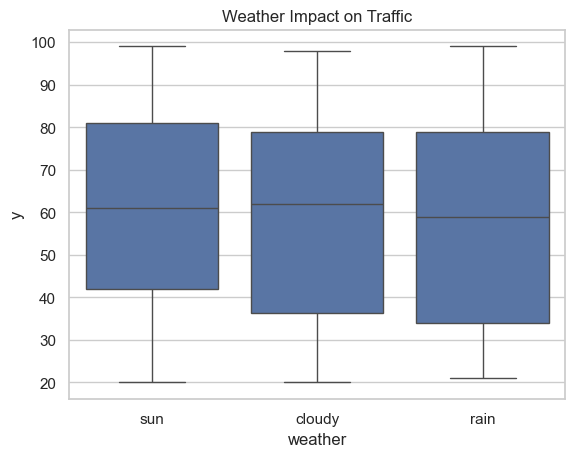

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x="weather", y="y")
plt.title("Weather Impact on Traffic")
plt.show()


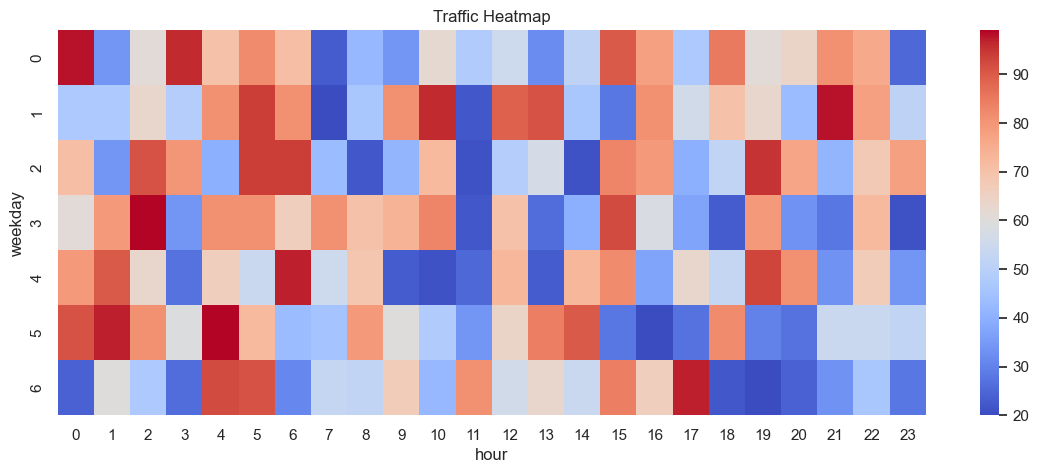

In [46]:
pivot = df.pivot_table(values="y", index="weekday", columns="hour")

plt.figure(figsize=(14,5))
sns.heatmap(pivot, cmap="coolwarm")
plt.title("Traffic Heatmap")
plt.show()


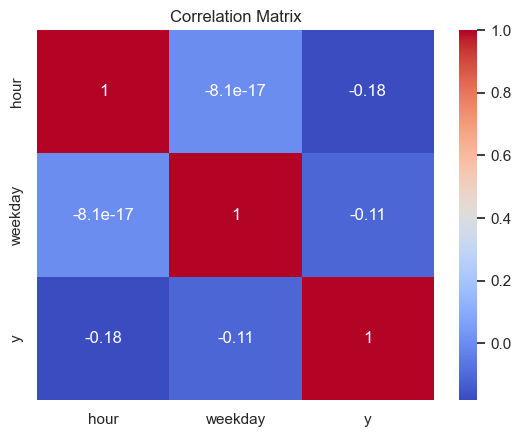

In [47]:
corr = df[["hour","weekday","y"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Erkenntnisse aus Phase U

1. Starke tägliche Saisonalität vorhanden
2. Wochenende reduziert Verkehrsaufkommen
3. Wetter beeinflusst Verkehr messbar
4. Keine fehlenden Daten → hohe Datenqualität
5. Zeitbasierte Features sind entscheidend

Hypothese:
Lag-Features + Zeitfeatures werden starke Prädiktoren sein.
